Ejemplo de cómo utilizar SHAP (SHapley Additive exPlanations) para interpretar un modelo de clasificación después de entrenarlo:
"""https://christophm.github.io/interpretable-ml-book/shap.html#shap-feature-importance"""

In [2]:
!pip install xgboost

     -------------------------------------- 125.4/125.4 MB 2.2 MB/s eta 0:00:00



[notice] A new release of pip available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Import necessary packages 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from xgboost import XGBClassifier

In [12]:
import os

In [14]:
os.listdir()

['.ipynb_checkpoints', 'Example_shap.ipynb', 'input', 'README.md']

In [15]:
# Data in https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download
df = pd.read_csv('input/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
# @title Define features and target 
X,y = df.iloc[:, :-1], df.iloc[:, -1]

In [17]:
#@title Split the dataset into 75% for training and 25% for testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [18]:
# Model 
model = XGBClassifier(random_state=42) 
model.fit(X_train, y_train) 
score = model.score(X_test, y_test)

In [20]:
!pip install shap

   -------------------------------------- 462.1/462.1 kB 781.7 kB/s eta 0:00:00


DEPRECATION: celery 5.0.2 has a non-standard dependency specifier pytz>dev. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: colab 1.13.5 has a non-standard dependency specifier pytz>=2011n. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of colab or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [21]:
#@title Load the model into the TreeExplainer function of shap 
import shap 
explainer = shap.TreeExplainer(model) 
shap_values = explainer.shap_values(X)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [22]:
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])

IndexError: index 439 is out of bounds for axis 0 with size 192

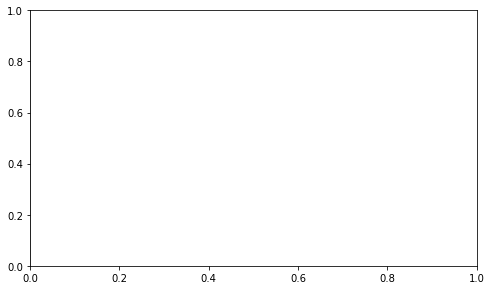

In [23]:
shap.summary_plot(shap_values, X_test)

In [ ]:
# Define feature names 
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
# Import module 
from pdpbox import pdp, get_dataset, info_plots
import matplotlib.pyplot as plt

In [ ]:
# Plot PDP for a single feature 
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=feature_names, feature='Glucose') 
pdp.pdp_plot(pdp_goals, 'Glucose') 
plt.show()

In [ ]:
# Use the pdp_interact() function 
interaction = pdp.pdp_interact(model=model, dataset=X_test, model_features=feature_names, features=['Age','BMI'])

In [ ]:
# Plot the graph 
pdp.pdp_interact_plot(pdp_interact_out=interaction, feature_names=['Age','BMI'], plot_type='contour', plot_pdp=True) 
plt.show()

Permutation Feature Importance

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance


In [ ]:
# Pass the model and test dataset
my_set = PermutationImportance(model, random_state=34).fit(X_test,y_test)
eli5.show_weights(my_set, feature_names = X_test.columns.tolist())


LIME (Explicaciones Locales Interpretables Modelo-Agnósticas) se utiliza ampliamente para explicar modelos de caja negra a nivel local. Cuando tenemos modelos complejos como CNN, LIME utiliza un modelo simple y explicativo para comprender su predicción. Para hacerlo aún más fácil de entender, veamos cómo funciona LIME paso a paso:

Definir tu punto local: Elige una predicción específica que desees explicar (por ejemplo, por qué una imagen fue clasificada como un gato por una CNN).
Generar variaciones: Crea ligeras variaciones en los datos de entrada (por ejemplo, píxeles ligeramente modificados en la imagen).
Predecir con el modelo original: Pasa la entrada a la CNN y obtén la clase de salida predicha para cada variación.
Construir un modelo explicativo: Entrena un modelo lineal simple para explicar la relación entre las variaciones y las predicciones del modelo.
Interpretar el modelo explicativo: Ahora, puedes interpretar el modelo explicativo con cualquier método como importancia de características, PDP, etc. para entender qué características jugaron un papel crucial en la predicción original.

Aplicaciones del mundo real
La Inteligencia Artificial Explicable es el puente que construye la confianza entre el mundo de la tecnología y los humanos. Veamos algunos ejemplos poderosos de Inteligencia Artificial Explicable en nuestro mundo cotidiano:

Prácticas justas de préstamos: La Inteligencia Artificial Explicable (XAI) puede proporcionar a los bancos explicaciones claras para las negaciones de préstamos. Las empresas pueden estar libres de riesgos de cumplimiento y también mejorar la confianza de su base de clientes.

Eliminar sesgos en la contratación: Muchas empresas utilizan sistemas de IA para filtrar inicialmente un gran número de solicitudes de empleo. Las herramientas XAI pueden revelar cualquier sesgo incrustado en los algoritmos de contratación impulsados por IA. Esto garantiza prácticas de contratación justas basadas en el mérito, no en sesgos ocultos.

Aumentar la adopción de vehículos autónomos: ¿Cuántos de ustedes confiarían en un coche sin conductor hoy? La XAI puede explicar el proceso de toma de decisiones de los coches autónomos en la carretera, como cambios de carril o maniobras de emergencia. Esto mejorará la confianza de los pasajeros.

Mejorar el diagnóstico médico: La XAI puede proporcionar transparencia en el proceso de diagnóstico al ofrecer una explicación post hoc de las salidas del modelo o diagnósticos. Esto permite a los profesionales médicos obtener una visión más holística del caso del paciente en cuestión.

Encuentra un ejemplo que involucre el diagnóstico de una infección por COVID-19 en la imagen a continuación.